In [ ]:
# Required imports
import os
import h5py
import zipfile
import numpy as np

# Step 1: Unzipping the folder
zip_path = './IA.zip'
extracted_folder = './IA'

# Unzip the file
try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_folder)
except FileNotFoundError:
    print(f"Zip file {zip_path} not found.")
    exit(1)
except zipfile.BadZipFile:
    print(f"Error: The file {zip_path} is not a valid zip file.")
    exit(1)


In [ ]:
# Function to check the structure of an H5 file
def inspect_h5_file_structure(h5_file_path):
    print(f"Inspecting file: {h5_file_path}")
    with h5py.File(h5_file_path, 'r') as h5_file:
        def print_structure(name, obj):
            if isinstance(obj, h5py.Group):
                print(f"Group: {name}")
            elif isinstance(obj, h5py.Dataset):
                print(f"Dataset: {name}, Shape: {obj.shape}, Dtype: {obj.dtype}")
        h5_file.visititems(print_structure)

# Function to process and convert a single H5 file to realdata_snippets format
def extract_h5_data(h5_file_path):
    with h5py.File(h5_file_path, 'r') as h5_file:
        try:
            FZ = h5_file['derivative_data']['block0_values'][:, 0]
            VitesseMoteur = h5_file['test_conditions']['block0_values'][:, 0]
            TC_BE_S = h5_file['derivative_data']['block0_values'][:, 4]
            TC_BE_M = h5_file['derivative_data']['block0_values'][:, 5]
            TC_BI_S = h5_file['derivative_data']['block0_values'][:, 7]
            TC_BI_M = h5_file['derivative_data']['block0_values'][:, 8]
            TC_BI_E = h5_file['derivative_data']['block0_values'][:, 9]
            TC_BE_10 = h5_file['derivative_data']['block0_values'][:, 10]
            DEP_D = h5_file['derivative_data']['block0_values'][:, 12]
            FY_Smoothed = h5_file['derivative_data']['block0_values'][:, 21]
            isSquealing = h5_file['derivative_data']['block0_values'][:, 42]

            snippet = np.stack([FZ, VitesseMoteur, TC_BE_S, TC_BE_M, TC_BI_S, TC_BI_M,
                                TC_BI_E, TC_BE_10, DEP_D, FY_Smoothed, isSquealing], axis=-1)
            return snippet
        except KeyError as e:
            print(f"Missing dataset in {h5_file_path}: {e}")
            return None

# Step 2: Function to process all H5 files in a folder
def extract_all_h5_files(folder_path):
    all_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.h5')]

    realdata_snippets_list = []
    for file in all_files:
        file_path = os.path.join(folder_path, file)
        print(f"Processing file: {file_path}")
        inspect_h5_file_structure(file_path)

        snippet = extract_h5_data(file_path)
        if snippet is not None:
            realdata_snippets_list.append(snippet)

    if realdata_snippets_list:
        return np.vstack(realdata_snippets_list)
    else:
        print("No valid data found in any H5 files.")
        return None

# Step 3: Run the extraction on the folder containing the H5 files
folder_path = './IA/'  # Update this with the actual path
realdata_snippets = extract_all_h5_files(folder_path)

if realdata_snippets is not None:
    print("All Real Data Snippets shape:", realdata_snippets.shape)
else:
    print("No real data snippets extracted.")


Streaming output truncated to the last 5000 lines.
Dataset: derivative_data/block0_items, Shape: (54,), Dtype: |S18
Dataset: derivative_data/block0_values, Shape: (3969, 54), Dtype: float64
Group: test_conditions
Dataset: test_conditions/axis0, Shape: (6,), Dtype: |S13
Dataset: test_conditions/axis1, Shape: (3969,), Dtype: int64
Dataset: test_conditions/block0_items, Shape: (6,), Dtype: |S13
Dataset: test_conditions/block0_values, Shape: (3969, 6), Dtype: float64
Processing file: /content/drive/MyDrive/PA_final/IA/essai297_derivativeDataIA.h5
Inspecting file: /content/drive/MyDrive/PA_final/IA/essai297_derivativeDataIA.h5
Group: derivative_data
Dataset: derivative_data/axis0, Shape: (54,), Dtype: |S18
Dataset: derivative_data/axis1, Shape: (3969,), Dtype: int64
Dataset: derivative_data/block0_items, Shape: (54,), Dtype: |S18
Dataset: derivative_data/block0_values, Shape: (3969, 54), Dtype: float64
Group: test_conditions
Dataset: test_conditions/axis0, Shape: (6,), Dtype: |S13
Dataset: 

In [ ]:
# Function to process and convert a single H5 file to realdata_snippets format
def extract_h5_data(h5_file_path):
    with h5py.File(h5_file_path, 'r') as h5_file:
        try:
            FZ = h5_file['derivative_data']['block0_values'][:, 0]
            VitesseMoteur = h5_file['test_conditions']['block0_values'][:, 0]
            TC_BE_S = h5_file['derivative_data']['block0_values'][:, 4]
            TC_BE_M = h5_file['derivative_data']['block0_values'][:, 5]
            TC_BI_S = h5_file['derivative_data']['block0_values'][:, 7]
            TC_BI_M = h5_file['derivative_data']['block0_values'][:, 8]
            TC_BI_E = h5_file['derivative_data']['block0_values'][:, 9]
            TC_BE_10 = h5_file['derivative_data']['block0_values'][:, 10]
            DEP_D = h5_file['derivative_data']['block0_values'][:, 12]
            FY_Smoothed = h5_file['derivative_data']['block0_values'][:, 21]
            isSquealing = h5_file['derivative_data']['block0_values'][:, 42]

            # Combine features into a snippet with shape (timesteps, 11)
            snippet = np.stack([FZ, VitesseMoteur, TC_BE_S, TC_BE_M, TC_BI_S, TC_BI_M,
                                TC_BI_E, TC_BE_10, DEP_D, FY_Smoothed, isSquealing], axis=-1)
            return snippet
        except KeyError:
            return None

# Step 2: Function to process all H5 files in a folder
def extract_all_h5_files(folder_path):
    all_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.h5')]

    realdata_snippets_list = []
    for file in all_files:
        file_path = os.path.join(folder_path, file)
        snippet = extract_h5_data(file_path)
        if snippet is not None:
            realdata_snippets_list.append(snippet)

    if realdata_snippets_list:
        return realdata_snippets_list
    else:
        return None

# Step 3: Run the extraction on the folder containing the H5 files
folder_path = './IA/'  # Update this with the actual path
realdata_snippets_list = extract_all_h5_files(folder_path)

if realdata_snippets_list is not None:
    # Print the overall structure: number of files, time steps per file, and 11 features
    overall_shape = [snippet.shape for snippet in realdata_snippets_list]
    print(f"Extracted data from {len(realdata_snippets_list)} files.")
    print(f"Shapes of individual files: {overall_shape}")
else:
    print("No real data snippets extracted.")


Extracted data from 680 files.
Shapes of individual files: [(6912, 11), (3348, 11), (3348, 11), (3357, 11), (3384, 11), (3438, 11), (3483, 11), (3465, 11), (3510, 11), (3510, 11), (3510, 11), (3510, 11), (3537, 11), (3546, 11), (3546, 11), (3546, 11), (3537, 11), (3537, 11), (3546, 11), (3537, 11), (3627, 11), (3645, 11), (3726, 11), (3726, 11), (3726, 11), (3726, 11), (3726, 11), (3726, 11), (3726, 11), (3708, 11), (3726, 11), (3726, 11), (3708, 11), (3735, 11), (3708, 11), (3726, 11), (3726, 11), (3726, 11), (3726, 11), (3735, 11), (3726, 11), (3735, 11), (3726, 11), (3762, 11), (3762, 11), (3780, 11), (3789, 11), (3789, 11), (3789, 11), (3789, 11), (3789, 11), (3807, 11), (3807, 11), (3807, 11), (3780, 11), (3807, 11), (3807, 11), (3807, 11), (3789, 11), (3807, 11), (3807, 11), (3789, 11), (3789, 11), (3807, 11), (3789, 11), (3780, 11), (3789, 11), (3807, 11), (3807, 11), (3789, 11), (3789, 11), (3807, 11), (3780, 11), (3834, 11), (3816, 11), (3843, 11), (3843, 11), (3816, 11), (384

In [ ]:
# Access the file at index 73
if realdata_snippets_list and len(realdata_snippets_list) > 73:  # Check if index is valid
    file_73_data = realdata_snippets_list[73]  # Access the 73rd file (zero-indexed)
    print(f"Shape of file at index 73: {file_73_data.shape}")
    print(file_73_data)  # Print the data if needed
else:
    print("File at index 73 does not exist or the list has fewer files.")


Shape of file at index 73: (3834, 11)
[[ 6.16560163e-02  2.00000000e+02  3.46788875e+01 ...  8.11287603e+00
   1.20852173e+00  2.62192253e+01]
 [-1.69827769e-01  2.00000000e+02  3.47008878e+01 ...  8.12083301e+00
   1.68107341e+00  2.56866140e+01]
 [-9.24339643e-02  2.00000000e+02  3.47561208e+01 ...  8.12162073e+00
   1.28428486e+00  2.63320381e+01]
 ...
 [ 2.96300496e-01  2.00000000e+02  4.06288342e+01 ...  8.11829007e+00
   1.90133574e+00  2.72058487e+01]
 [ 1.93747458e-01  2.00000000e+02  4.05932158e+01 ...  8.11553870e+00
   1.85364322e+00  2.77080798e+01]
 [ 1.84033185e-01  2.00000000e+02  4.05778506e+01 ...  8.11240338e+00
   1.61804284e+00  2.66167342e+01]]


In [ ]:
import numpy as np

# Define the number of time steps to extract
total_time_steps = 2000 # implement a check here that if the length realdata_snippets[0].shape is less than 2000 or not , if it"s more then leave it at 2000 if not then take an even number

# # Min and max values for normalization
min_values = np.array([
    -3.074102196521146,
    200.0,
    26.1864778708738,
    26.195915014184454,
    26.0423151927734,
    25.98615493551135,
    26.04207923144635,
    26.186949730010678,
    6.202448426885667,
    8.263208084611392,
    22.50224994572223
])

max_values = np.array([
    615.5482862622806,
    800.0,
    214.58230493473238,
    220.622388927214,
    191.28653951726687,
    213.05137538967594,
    245.27471404148983,
    249.36518753110335,
    8.937320052309452,
    247.9732772214217,
    99.93147872634104
])

# # Function to normalize the data using min-max scaling
def normalize_data(data, min_vals, max_vals):
    return (data - min_vals) / (max_vals - min_vals)

# # Extract the first 2000 time steps from realdata_snippets
realdata_snippets_first_2000 = realdata_snippets_list[73][:total_time_steps]

# Normalize the first 2000 time steps
# the normalized values are not used here as the focus is on using predict_tf which denormalize anyway
normalized_realdata_snippets = normalize_data(realdata_snippets_first_2000, min_values, max_values)
realdata_snippets_first_2000[:total_time_steps, -1] = normalized_realdata_snippets[:total_time_steps, -1]



In [ ]:
# Split the normalized data into U, E, X, and squeal prediction
full_U_steps_real = realdata_snippets_first_2000[:, 0].reshape(total_time_steps, 1)  # FZ (Input channel)
full_E_steps_real = realdata_snippets_first_2000[:, 1].reshape(total_time_steps, 1)  # VitesseMoteur (Environment channel)
full_X_steps_real = realdata_snippets_first_2000[:, 2:10].reshape(total_time_steps, 8)  # State channels
full_squeal_real = realdata_snippets_first_2000[:, 10].reshape(total_time_steps, 1)  # isSquealing (Squeal prediction)

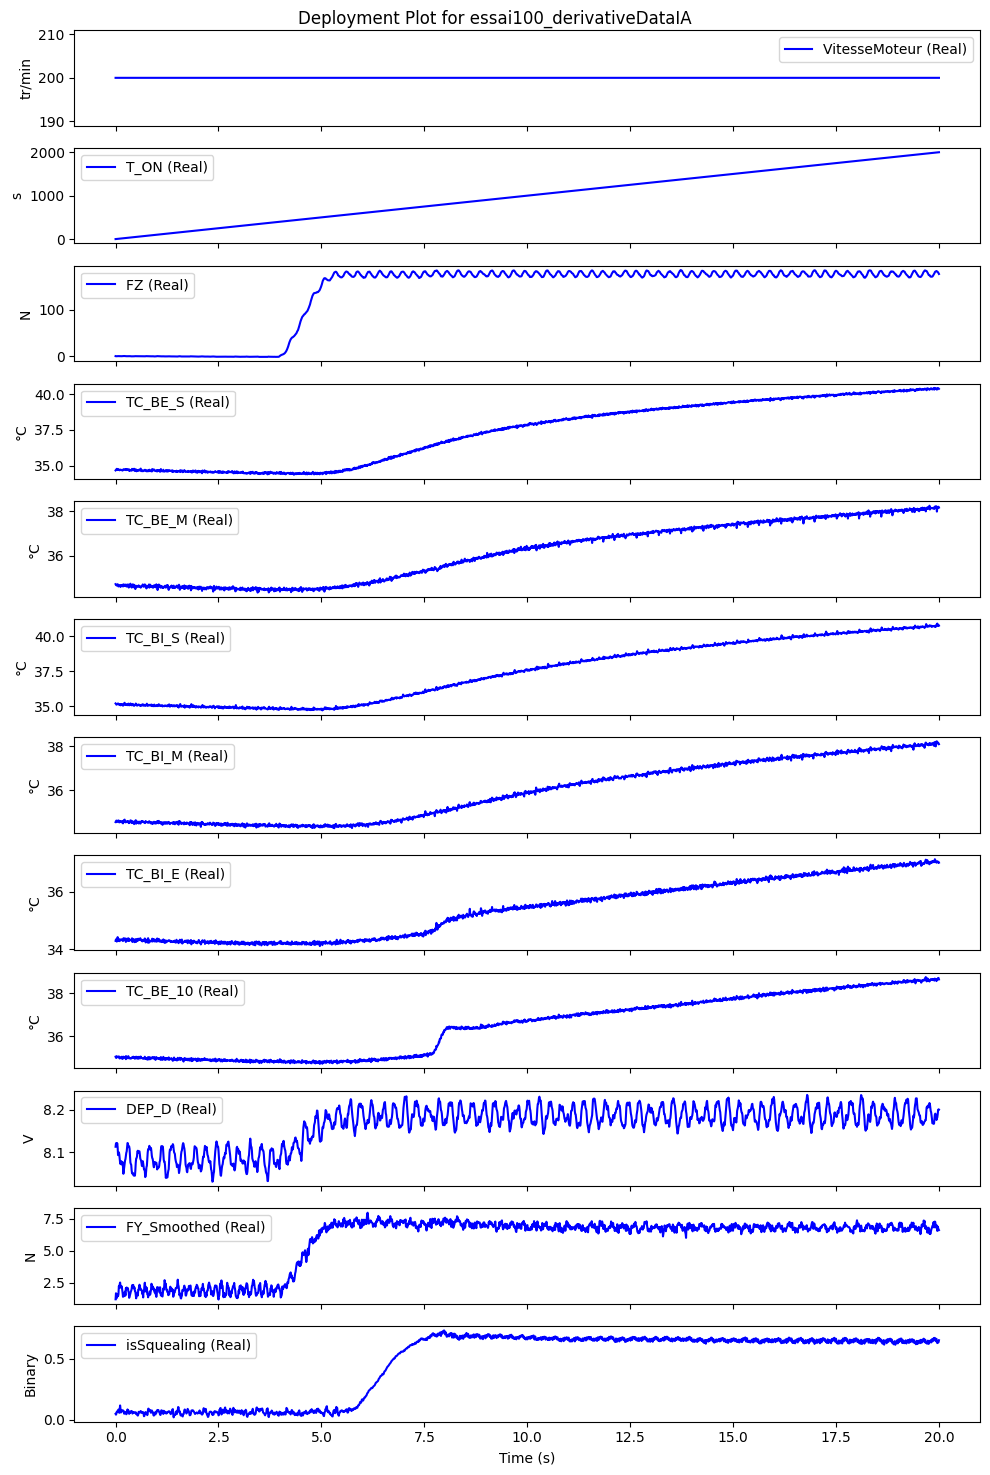

All plots generated successfully.


In [ ]:
import matplotlib.pyplot as plt

# Updated function to generate the plots for real data only
def generate_plots(U_real, E_real, X_real, squeal_real, time_steps, file_name):
    """
    Generate plots for real data only, focusing on FZ, VitesseMoteur,
    state variables, and squeal occurrence. Units revised to match the description table.
    """
    fig, axs = plt.subplots(12, 1, figsize=(10, 15), sharex=True)

    # Plot VitesseMoteur (Rotational velocity)
    axs[0].plot(time_steps, E_real[:, 0], label='VitesseMoteur (Real)', color='blue')
    axs[0].set_ylabel('tr/min')  # Rotational velocity in tr/min
    axs[0].legend()

    # Placeholder for T_ON (time in seconds)
    axs[1].plot(time_steps, np.arange(len(time_steps)), label='T_ON (Real)', color='blue')
    axs[1].set_ylabel('s')  # Contact duration in seconds
    axs[1].legend()

    # Plot FZ (Normal Force)
    axs[2].plot(time_steps, U_real[:, 0], label='FZ (Real)', color='blue')
    axs[2].set_ylabel('N')  # Force in Newtons
    axs[2].legend()

    # Plot state variables (temperatures, displacements, etc.)
    labels = ['TC_BE_S', 'TC_BE_M', 'TC_BI_S', 'TC_BI_M', 'TC_BI_E', 'TC_BE_10', 'DEP_D', 'FY_Smoothed']
    units = ['°C', '°C', '°C', '°C', '°C', '°C', 'V', 'N']  # Units for each variable

    for i in range(8):
        axs[i + 3].plot(time_steps, X_real[:, i], label=f'{labels[i]} (Real)', color='blue')
        axs[i + 3].set_ylabel(units[i])  # Use appropriate units from the table
        axs[i + 3].legend()

    # Plot the squeal occurrence
    axs[11].plot(time_steps, squeal_real, label='isSquealing (Real)', color='blue')
    axs[11].set_ylabel('Binary')  # Binary indicator
    axs[11].legend()

    # Set common labels and title
    plt.suptitle(f'Deployment Plot for {file_name}')
    plt.xlabel('Time (s)')  # Time in seconds
    plt.tight_layout()
    plt.show()

# Time steps array for plotting (corresponding to 20 seconds, assuming 100 Hz sampling rate)
time_steps = np.linspace(0, 20, total_time_steps)  # 2000 time steps over 20 seconds

# Example file name for the plot title
file_name = 'essai100_derivativeDataIA'

# Call the updated plot function with real data
generate_plots(full_U_steps_real,
               full_E_steps_real,
               full_X_steps_real,
               full_squeal_real,
               time_steps,
               file_name)

print("All plots generated successfully.")


# ** Distribution Analysis (Boxplots)**

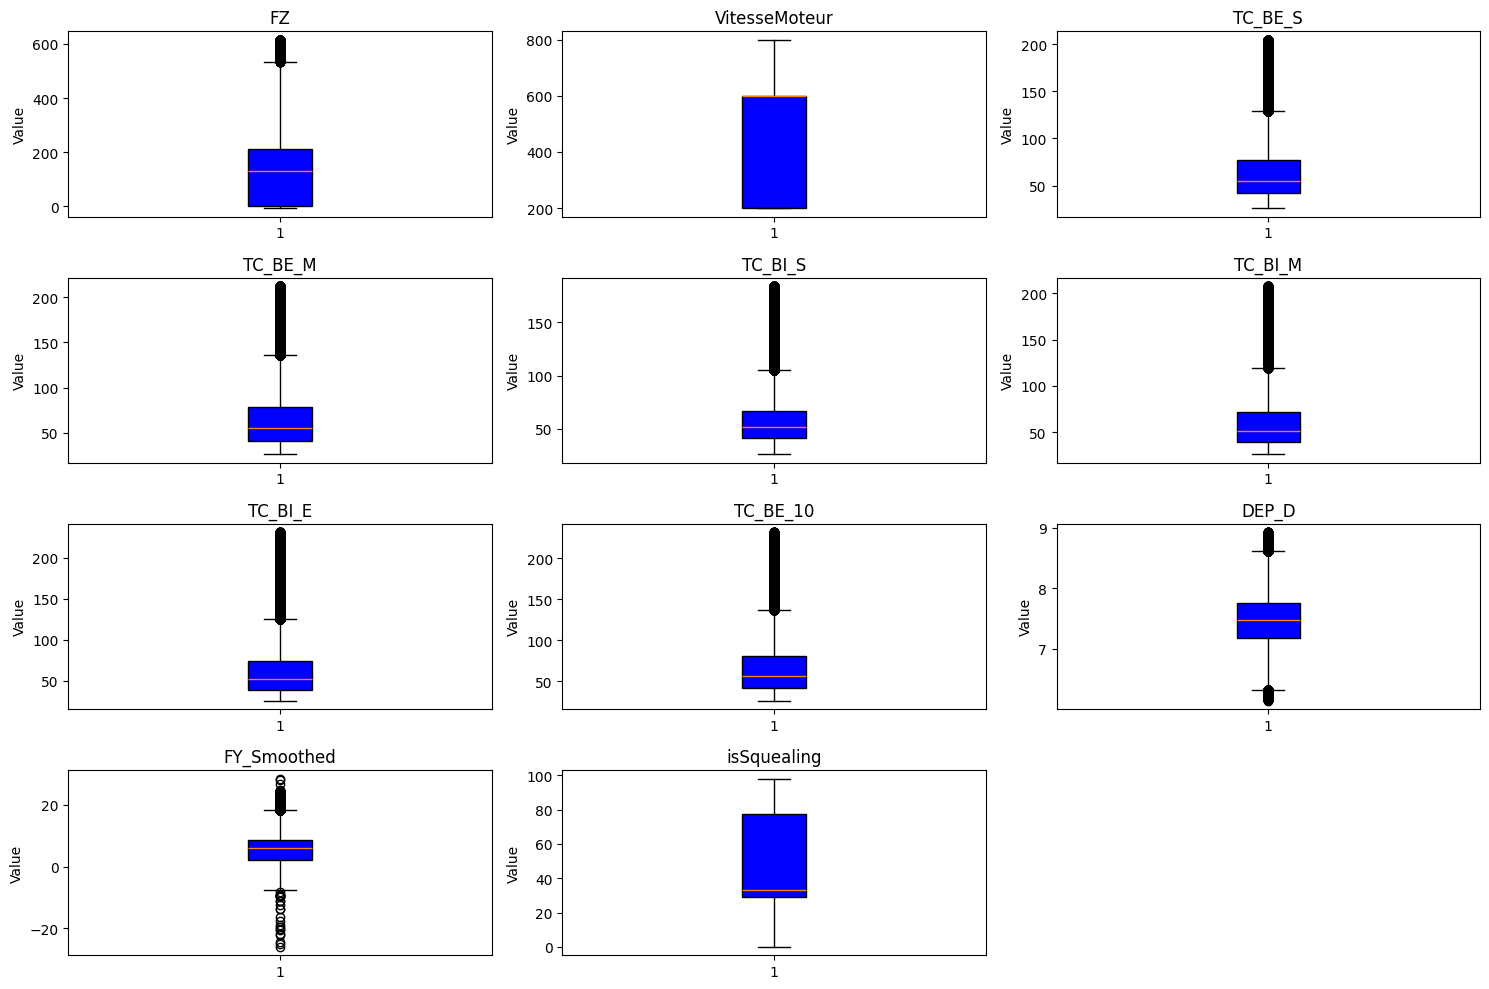

In [ ]:
import matplotlib.pyplot as plt

# Ensure all files have the same number of timesteps
min_timesteps = min([snippet.shape[0] for snippet in realdata_snippets_list])
uniform_snippets = [snippet[:min_timesteps] for snippet in realdata_snippets_list]

# Combine all snippets into a single array for analysis
combined_data = np.vstack(uniform_snippets)

# Feature names from your dataset
feature_names = ['FZ', 'VitesseMoteur', 'TC_BE_S', 'TC_BE_M', 'TC_BI_S',
                 'TC_BI_M', 'TC_BI_E', 'TC_BE_10', 'DEP_D', 'FY_Smoothed', 'isSquealing']

# Create boxplots for each feature
plt.figure(figsize=(15, 10))
for i in range(combined_data.shape[1]):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(combined_data[:, i], patch_artist=True, boxprops=dict(facecolor="blue"))
    plt.title(f'{feature_names[i]}')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()


**# Correlation Analysis (Heatmap)**

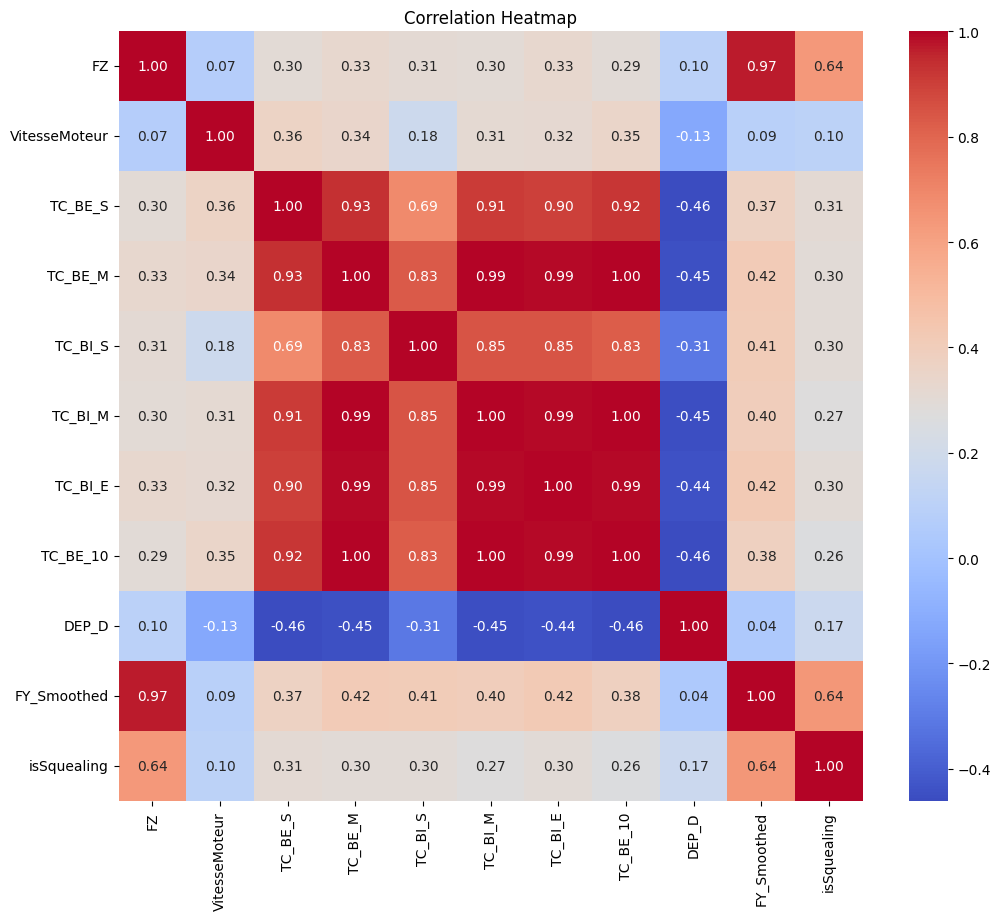

In [ ]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = np.corrcoef(combined_data.T)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=feature_names, yticklabels=feature_names)
plt.title("Correlation Heatmap")
plt.show()


**Statistical Analysis (Histograms)**

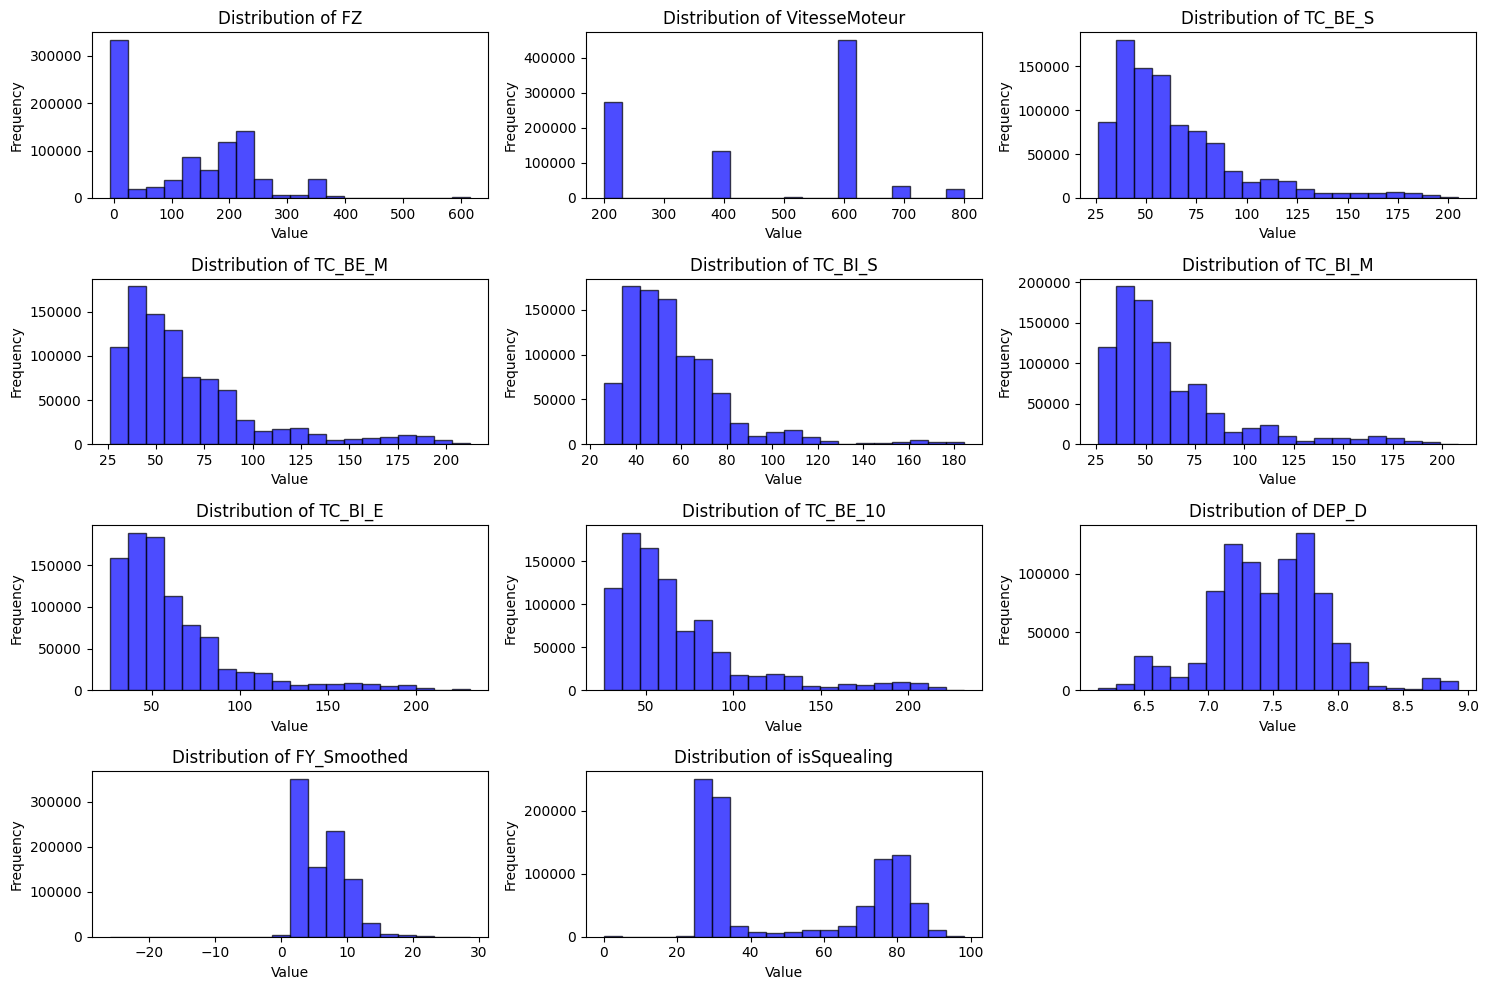

In [ ]:
# Generate histograms for each feature
plt.figure(figsize=(15, 10))
for i in range(combined_data.shape[1]):
    plt.subplot(4, 3, i + 1)
    plt.hist(combined_data[:, i], bins=20, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {feature_names[i]}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
